In [1]:
import os
from os.path import realpath, join
import sys
sys.path.insert(0, '/home/chuah/mitsuba3-camera/build/python')

import drjit as dr
import mitsuba as mi
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# mi.set_variant('cuda_ad_rgb')
mi.set_variant('cuda_ad_dispersion')

In [2]:
SCENE_DIR = realpath('../tutorials/scenes')

# Make sure that resources from the scene directory can be found
mi.Thread.thread().file_resolver().append(SCENE_DIR)

In [3]:
output_dir = realpath(join('.', 'outputs', 'lens'))
os.makedirs(output_dir, exist_ok=True)
print('[i] Results will be saved to:', output_dir)

[i] Results will be saved to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens


# Set lens parameters

In [4]:
from scripts.lens_design.lens import ConicSurface, EvenAsphericSurface, LensMaterial, LensSystem


# BFL = FFL = 325.439588
surf0 = { 'c': -0.3, 'K': 0.0, 'z0': 2.5 }
surf1 = { 'c': 0.3,  'K': 0.0, 'z0': 2.8 }

# # RayOptics BFL = 280.743881, FFL = 276.563327
# surf0 = { 'c': -0.277226358652119, 'K': 0.0, 'z0': 2.5 }
# surf1 = { 'c':  0.421164870262146, 'K': 0.0, 'z0': 2.8 }

# surf0 = {'c': -0.28128084540367126, 'K': -0.3558797538280487, 'z0': 2.593641996383667}
# surf1 = {'c': 0.3993512690067291, 'K': -0.44850954413414, 'z0': 3.19931960105896}

surf0 = ConicSurface(radial_extent=0.8, **surf0)
surf1 = ConicSurface(radial_extent=0.8, **surf1)
# surf0 = EvenAsphericSurface(**surf0)
# surf1 = EvenAsphericSurface(**surf1)

surfaces = [surf0, surf1]
# radial_extents = [0.8 for _ in surfaces]
materials = [LensMaterial("nbk7", 1.5047, 64.17)]

lens_system = LensSystem(surfaces, materials)
lens_system.initialize_geometry(output_dir)
lens_system.disable_all_materials()
lens_system.disable_surface_vars("z0")
lens_system.disable_surface_vars("K")
# lens_system.meshplot_geometry(shading={"wireframe": True})

[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens0.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle0.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens1.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle1.ply


In [5]:
from scripts.lens_design.lens import test_focal_lengths

test_focal_lengths()

BFL matches image plane:  [20.566852569580078] 20.4
[50.02990341] [49.999855]
BFL matches image plane:  [43.12704086303711] 42.95
[50.04488754] [50.000541]


[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens0.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle0.ply
[+] Wrote lens mesh (subdivs=7) file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/lens1.ply
[+] Wrote baffle mesh file to: /home/chuah/mitsuba3-camera/notebooks/outputs/lens/baffle1.ply
[9.58610326051712e-06]
y is close:  True
[1.3655517250299454e-06]
u is close:  True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


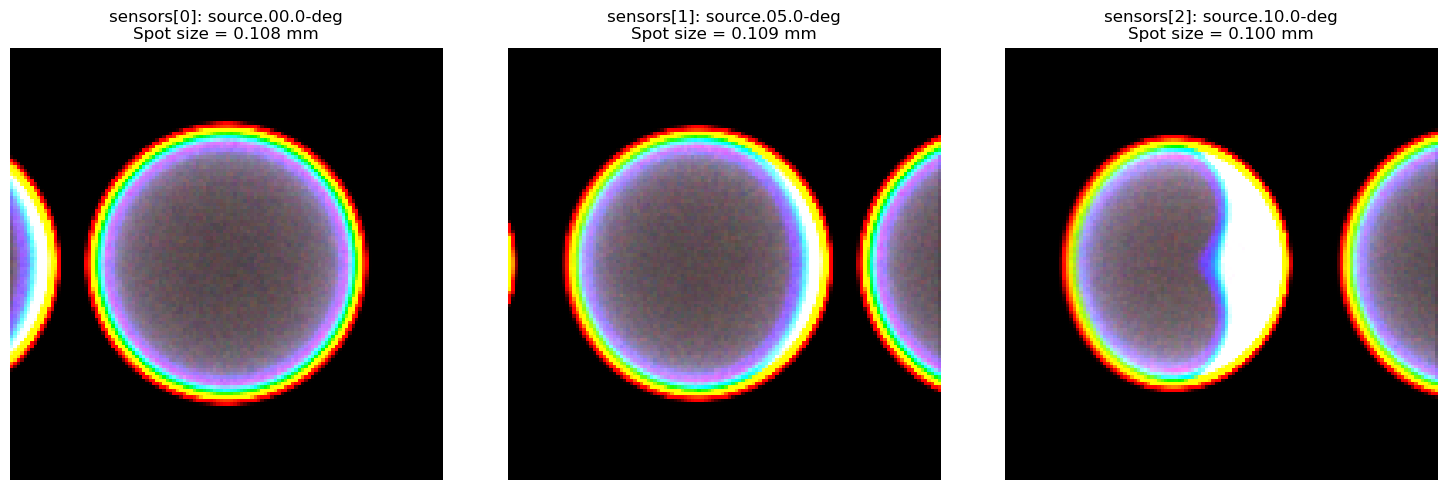

In [6]:
from scripts.lens_design.design_problem import DesignProblem

# lens_system.front_z = 2.8

problem = DesignProblem(
    lens_system,
    resolution=(128, 128),
    spp=64,
    learning_rate=1e-3,
    iters=400,
    output_dir = output_dir,
    init_camera_z=0.03,
    num_sources=3,
    max_field_angle=10,
    )

problem.prepare()
problem.plot_spots(scale=1)

In [7]:
# losses, images_final, images_init, upsample_steps = problem.optimize()
losses, images_final, images_init, upsample_steps, sizes_init, sizes_final = problem.optimize()


2024-06-07 09:50:58 WARN main [Mesh] Mesh::build_directed_edges(): there are 1280 non-manifold vertices in the follwing mesh: PLYMesh[
2024-06-07 09:50:58 WARN main [Mesh] name = "baffle1.ply",
2024-06-07 09:50:58 WARN main [Mesh] bbox = BoundingBox3f[
2024-06-07 09:50:58 WARN main [Mesh] min = [-0.88, -0.88, 2.70258],
2024-06-07 09:50:58 WARN main [Mesh] max = [0.88, 0.88, 2.70258]
2024-06-07 09:50:58 WARN main [Mesh] ],
2024-06-07 09:50:58 WARN main [Mesh] vertex_count = 1280,
2024-06-07 09:50:58 WARN main [Mesh] vertices = [30 KiB of vertex data],
2024-06-07 09:50:58 WARN main [Mesh] face_count = 2560,
2024-06-07 09:50:58 WARN main [Mesh] faces = [30 KiB of face data],
2024-06-07 09:50:58 WARN main [Mesh] face_normals = 0
2024-06-07 09:50:58 WARN main [Mesh] ]

2024-06-07 09:50:58 WARN main [Mesh] Mesh::build_directed_edges(): there are 1280 non-manifold vertices in the follwing mesh: PLYMesh[
2024-06-07 09:50:58 WARN main [Mesh] name = "baffle0.ply",
2024-06-07 09:50:58 WARN main [Mesh] bbox = BoundingBox3f[
2024-06-07 09:50:58 WARN main [Mesh] min = [-0.88, -0.88, 2.59742],
2024-06-07 09:50:58 WARN main [Mesh] max = [0.88, 0.88, 2.59742]
2024-06-07 09:50:58 WARN main [Mesh] ],
2024-06-07 09:50:58 WARN main [Mesh] vertex_count = 1280,
2024-06-07 09:50:58 WARN main [Mesh] vertices = [30 KiB of vertex data],
2024-06-07 09:50:58 WARN main [Mesh] face_count = 2560,
2024-06-07 09:50:58 WARN main [Mesh] faces = [30 KiB of face data],
2024-06-07 09:50:58 WARN main [Mesh] face_normals = 0
2024-06-07 09:50:58 WARN main [Mesh] ]

Iter 31: upsampling to level 1 due to loss[0] = 30.73223114013672
[sensor_10_0-deg] Setting new camera pos: [-4.81285512e-01 -1.19209290e-07  7.50000000e-02]


In [8]:
print(f"Upsampling steps: {upsample_steps}")

Upsampling steps: 1


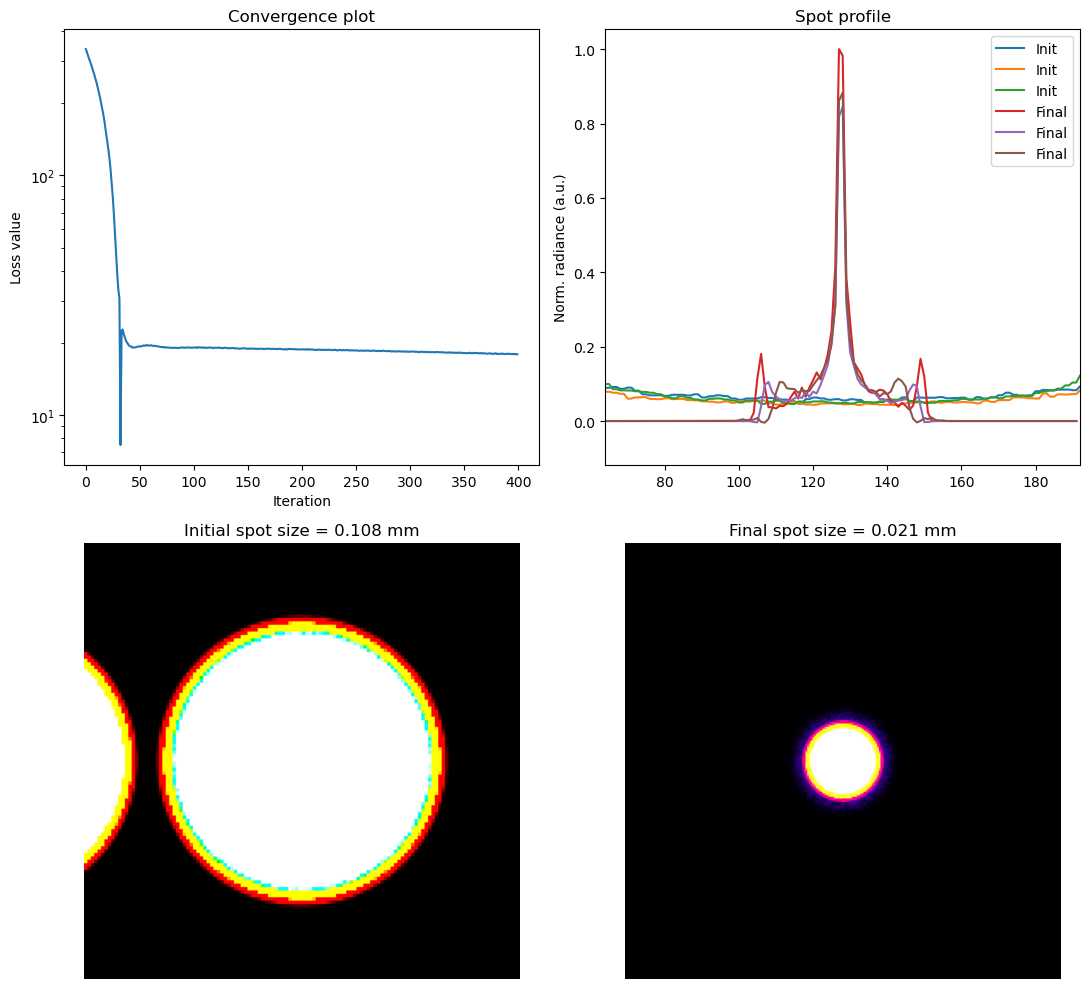

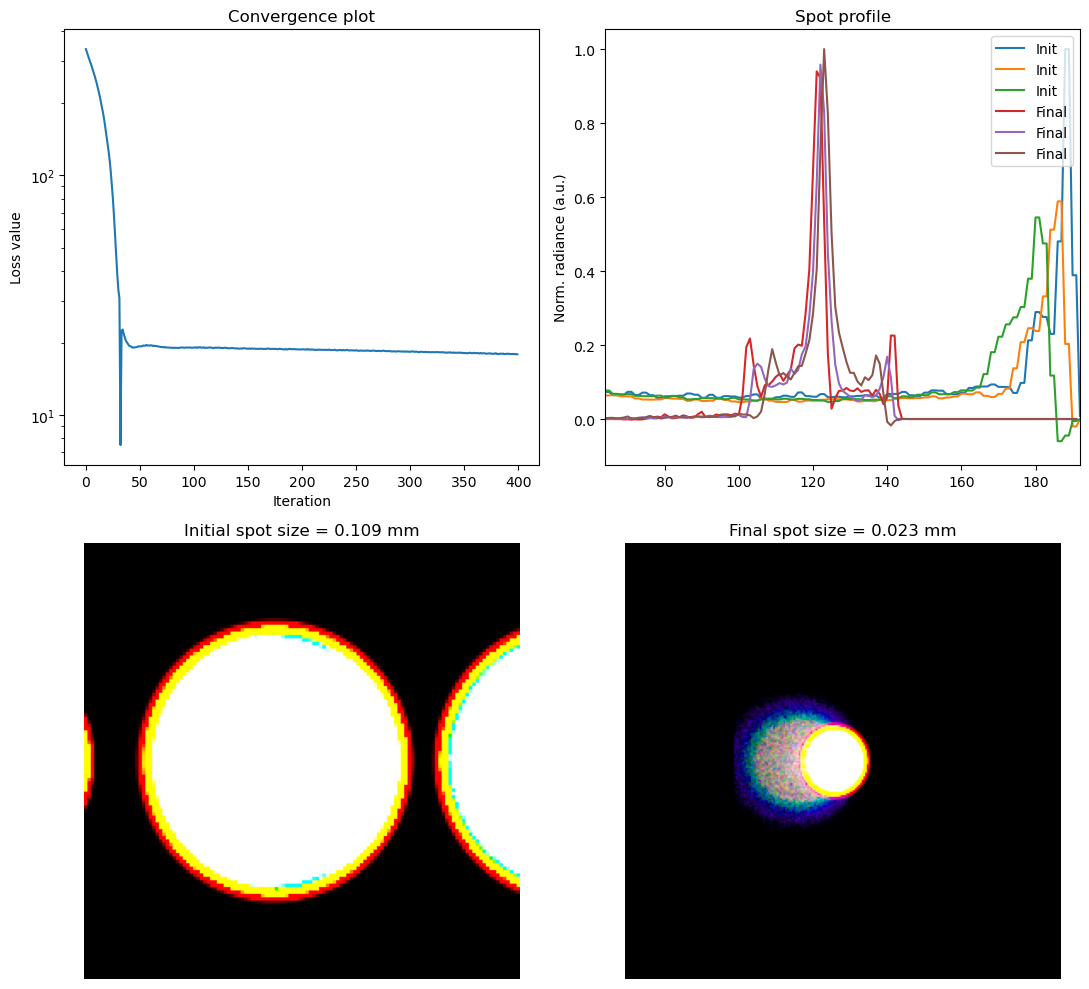

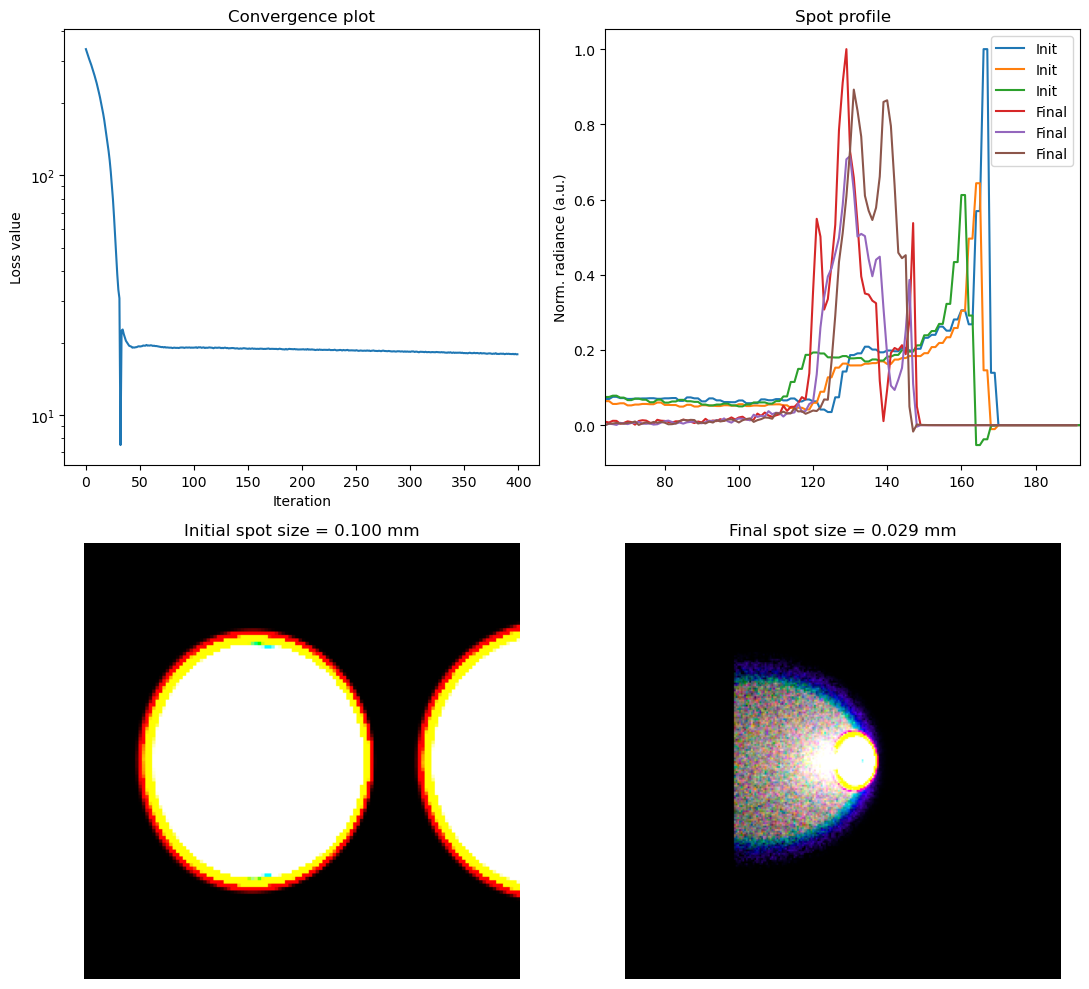

In [9]:
# from scripts.lens_design.design_problem import plot_progress

# for image_i, image_f in zip(images_init, images_final):
#     _ = plot_progress(image_i, image_f, losses, upsample_steps, False)
#     # mi.util.write_bitmap("spot_i.exr", image_i)
#     # mi.util.write_bitmap("spot_f.exr", image_f)


from scripts.lens_design.design_problem import plot_progress

for image_i, image_f, spot_size_init, spot_size_final in zip(images_init, images_final, sizes_init, sizes_final):
    _ = plot_progress(image_i, image_f, spot_size_init, spot_size_final, losses, upsample_steps, False)
    # mi.util.write_bitmap("spot_i.exr", image_i)
    # mi.util.write_bitmap("spot_f.exr", image_f)


In [10]:
print(problem.lens_system.materials[0].params)
print(problem.lens_system.materials[1].params)
print(problem.lens_system.elements[0].surface.params)
print(problem.lens_system.elements[1].surface.params)

{'ior': 1.000277, 'V_d': 0.0}
{'ior': 1.5047, 'V_d': 64.17}
{'c': [-0.2629818320274353], 'K': 0.0, 'z0': 2.5}
{'c': [0.2924300730228424], 'K': 0.0, 'z0': 2.8}
